In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [56]:
df = pd.read_csv(r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\Final_Toronto_Dataset.csv", parse_dates=['Date'], index_col='Date')

In [57]:
df.head()

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_population,Ontario_Immigrants_International,Ontario_Emigrants_International,...,Unemployment_rate_toronto,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete),Prime_Rate_2,Bank_of_Canada_Overnight_Rate
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.502559,7.400,2.800000,33393.91068,262.1820,2641.687163,265.296667,11771945.00,34801.00000,3144.000000,...,5.3,68.6,65.0,4882618.000,528.0,185757.6686,1457.0,511.0,7.25,7.11
2001-02-01,1.521981,7.250,3.274302,33414.60595,258.2500,2474.819966,261.310800,11789226.50,37662.09142,2596.931225,...,6.4,68.6,64.2,4894687.054,732.0,189990.7036,946.0,227.0,7.25,7.11
2001-03-01,1.557832,6.750,3.523191,33421.15412,250.7975,1999.363187,262.573929,11806462.06,39796.62476,2862.309003,...,6.3,69.0,64.7,4905287.460,925.0,191476.2205,1015.0,387.0,6.75,5.25
2001-04-01,1.558629,6.625,3.600000,33411.95797,247.6000,1929.581512,260.073810,11827345.00,41662.00000,3997.000000,...,6.2,69.2,65.0,4916690.735,836.0,189802.6914,1503.0,1151.0,6.50,4.86
2001-05-01,1.541287,6.450,3.475476,33549.86515,254.8020,2178.740467,271.755600,11849356.01,42969.07156,5936.427697,...,6.1,69.6,65.4,4927393.091,958.0,191658.3372,1810.0,175.0,6.25,5.44


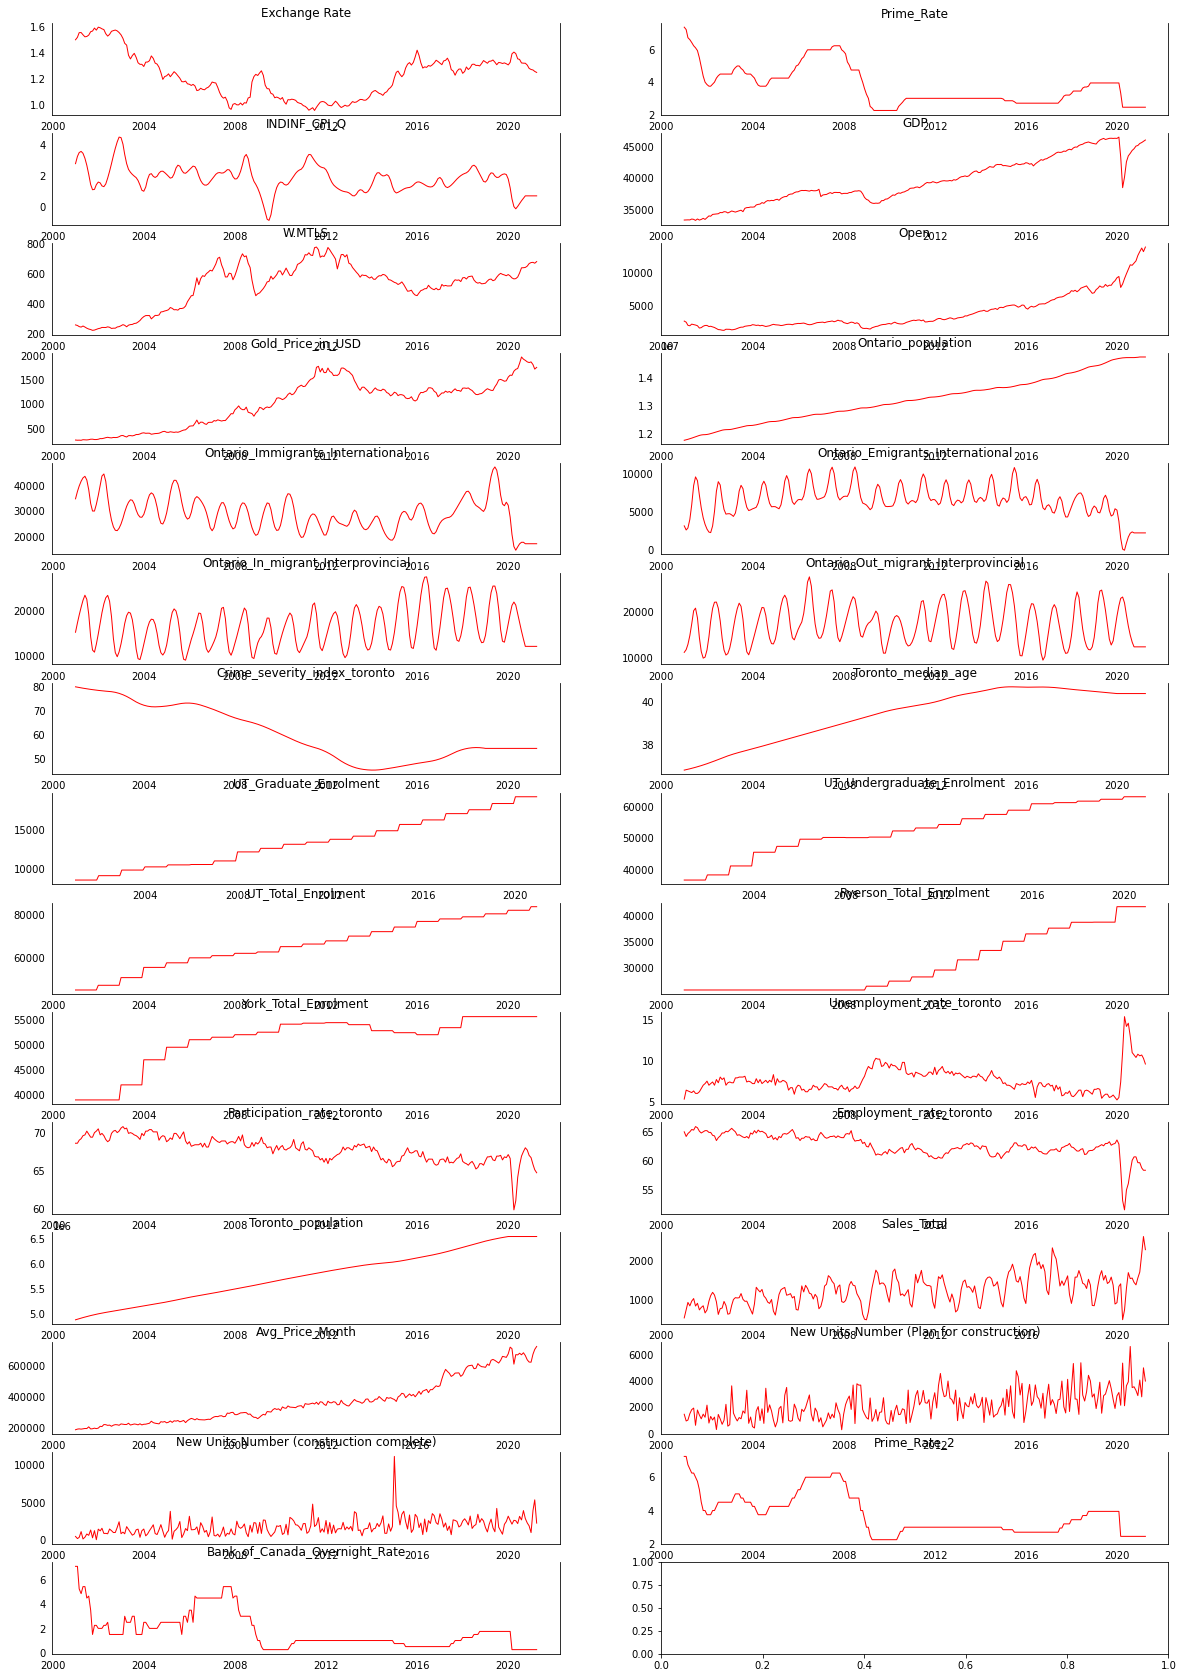

In [58]:
try:
    # Plot
    fig, axes = plt.subplots(nrows=int(len(df.columns)/2+1), ncols=2, figsize=(20,30))
    for i, ax in enumerate(axes.flatten()):
        data = df[df.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
    #     ax.tick_params(labelsize=6)

    plt.tight_layout();
except:
    pass

In [59]:
for col in df.columns:
    if "Change_Rate" in col:
        df.drop(columns=[col], inplace=True)

In [60]:
df = df[['Exchange Rate', 'Prime_Rate', 'INDINF_CPI_Q', 'GDP', 'W.MTLS', 'Open',
       'Gold_Price_in_USD', 'Ontario_Immigrants_International',
       'Ontario_Emigrants_International', 'Ontario_In_migrant_Interprovincial',
       'Ontario_Out_migrant_Interprovincial', 'Crime_severity_index_toronto',
       'Toronto_median_age', 'UT_Total_Enrolment',
       'Participation_rate_toronto', 'Employment_rate_toronto',
       'Toronto_population', 'Sales_Total', 'Avg_Price_Month',
       'New Units Number (Plan for construction)',
       'New Units Number (construction complete)']]

In [61]:
df.dropna(inplace=True)

In [62]:
df

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,...,Crime_severity_index_toronto,Toronto_median_age,UT_Total_Enrolment,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete)
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.502559,7.400,2.800000,33393.91068,262.1820,2641.687163,265.296667,34801.00000,3144.000000,15176.00000,...,80.040000,36.800000,45261.0,68.6,65.0,4882618.000,528.0,185757.6686,1457.0,511.0
2001-02-01,1.521981,7.250,3.274302,33414.60595,258.2500,2474.819966,261.310800,37662.09142,2596.931225,17272.33196,...,79.883354,36.820147,45261.0,68.6,64.2,4894687.054,732.0,189990.7036,946.0,227.0
2001-03-01,1.557832,6.750,3.523191,33421.15412,250.7975,1999.363187,262.573929,39796.62476,2862.309003,19017.66529,...,79.746533,36.839195,45261.0,69.0,64.7,4905287.460,925.0,191476.2205,1015.0,387.0
2001-04-01,1.558629,6.625,3.600000,33411.95797,247.6000,1929.581512,260.073810,41662.00000,3997.000000,20786.00000,...,79.600220,36.861226,45261.0,69.2,65.0,4916690.735,836.0,189802.6914,1503.0,1151.0
2001-05-01,1.541287,6.450,3.475476,33549.86515,254.8020,2178.740467,271.755600,42969.07156,5936.427697,22333.20337,...,79.463797,36.883489,45261.0,69.6,65.4,4927393.091,958.0,191658.3372,1810.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,1.281517,2.450,0.700000,45143.29965,669.8060,12605.309530,1852.895217,17281.00000,2212.000000,12011.00000,...,54.180000,40.400000,82311.0,67.0,59.7,6555205.000,1551.0,625828.1154,2876.0,1903.0
2021-01-01,1.273017,2.450,0.700000,45461.59117,676.4900,13195.814200,1865.722381,17281.00000,2212.000000,12011.00000,...,54.180000,40.400000,83970.0,66.7,59.7,6555205.000,1703.0,624885.6230,4063.0,1018.0
2021-02-01,1.269159,2.450,0.700000,45606.79326,678.0100,13733.605730,1810.338000,17281.00000,2212.000000,12011.00000,...,54.180000,40.400000,83970.0,65.8,58.8,6555205.000,2167.0,676837.4998,2783.0,3929.0


In [63]:
df["Date"] = df.index
df["Month"] = df.apply(lambda x: str(x["Date"]).split("-")[1], axis=1)
df["Month"] = df["Month"].astype("float64")
df.drop(columns=["Date"], inplace=True)

In [64]:
df.columns

Index(['Exchange Rate', 'Prime_Rate', 'INDINF_CPI_Q', 'GDP', 'W.MTLS', 'Open',
       'Gold_Price_in_USD', 'Ontario_Immigrants_International',
       'Ontario_Emigrants_International', 'Ontario_In_migrant_Interprovincial',
       'Ontario_Out_migrant_Interprovincial', 'Crime_severity_index_toronto',
       'Toronto_median_age', 'UT_Total_Enrolment',
       'Participation_rate_toronto', 'Employment_rate_toronto',
       'Toronto_population', 'Sales_Total', 'Avg_Price_Month',
       'New Units Number (Plan for construction)',
       'New Units Number (construction complete)', 'Month'],
      dtype='object')

In [65]:
df.drop(columns=["Exchange Rate", "Gold_Price_in_USD", "Ontario_Emigrants_International", "Ontario_Emigrants_International", 
                 "Ontario_In_migrant_Interprovincial", 'Ontario_Out_migrant_Interprovincial', 'Crime_severity_index_toronto'], inplace = True)

In [66]:
df.columns

Index(['Prime_Rate', 'INDINF_CPI_Q', 'GDP', 'W.MTLS', 'Open',
       'Ontario_Immigrants_International', 'Toronto_median_age',
       'UT_Total_Enrolment', 'Participation_rate_toronto',
       'Employment_rate_toronto', 'Toronto_population', 'Sales_Total',
       'Avg_Price_Month', 'New Units Number (Plan for construction)',
       'New Units Number (construction complete)', 'Month'],
      dtype='object')

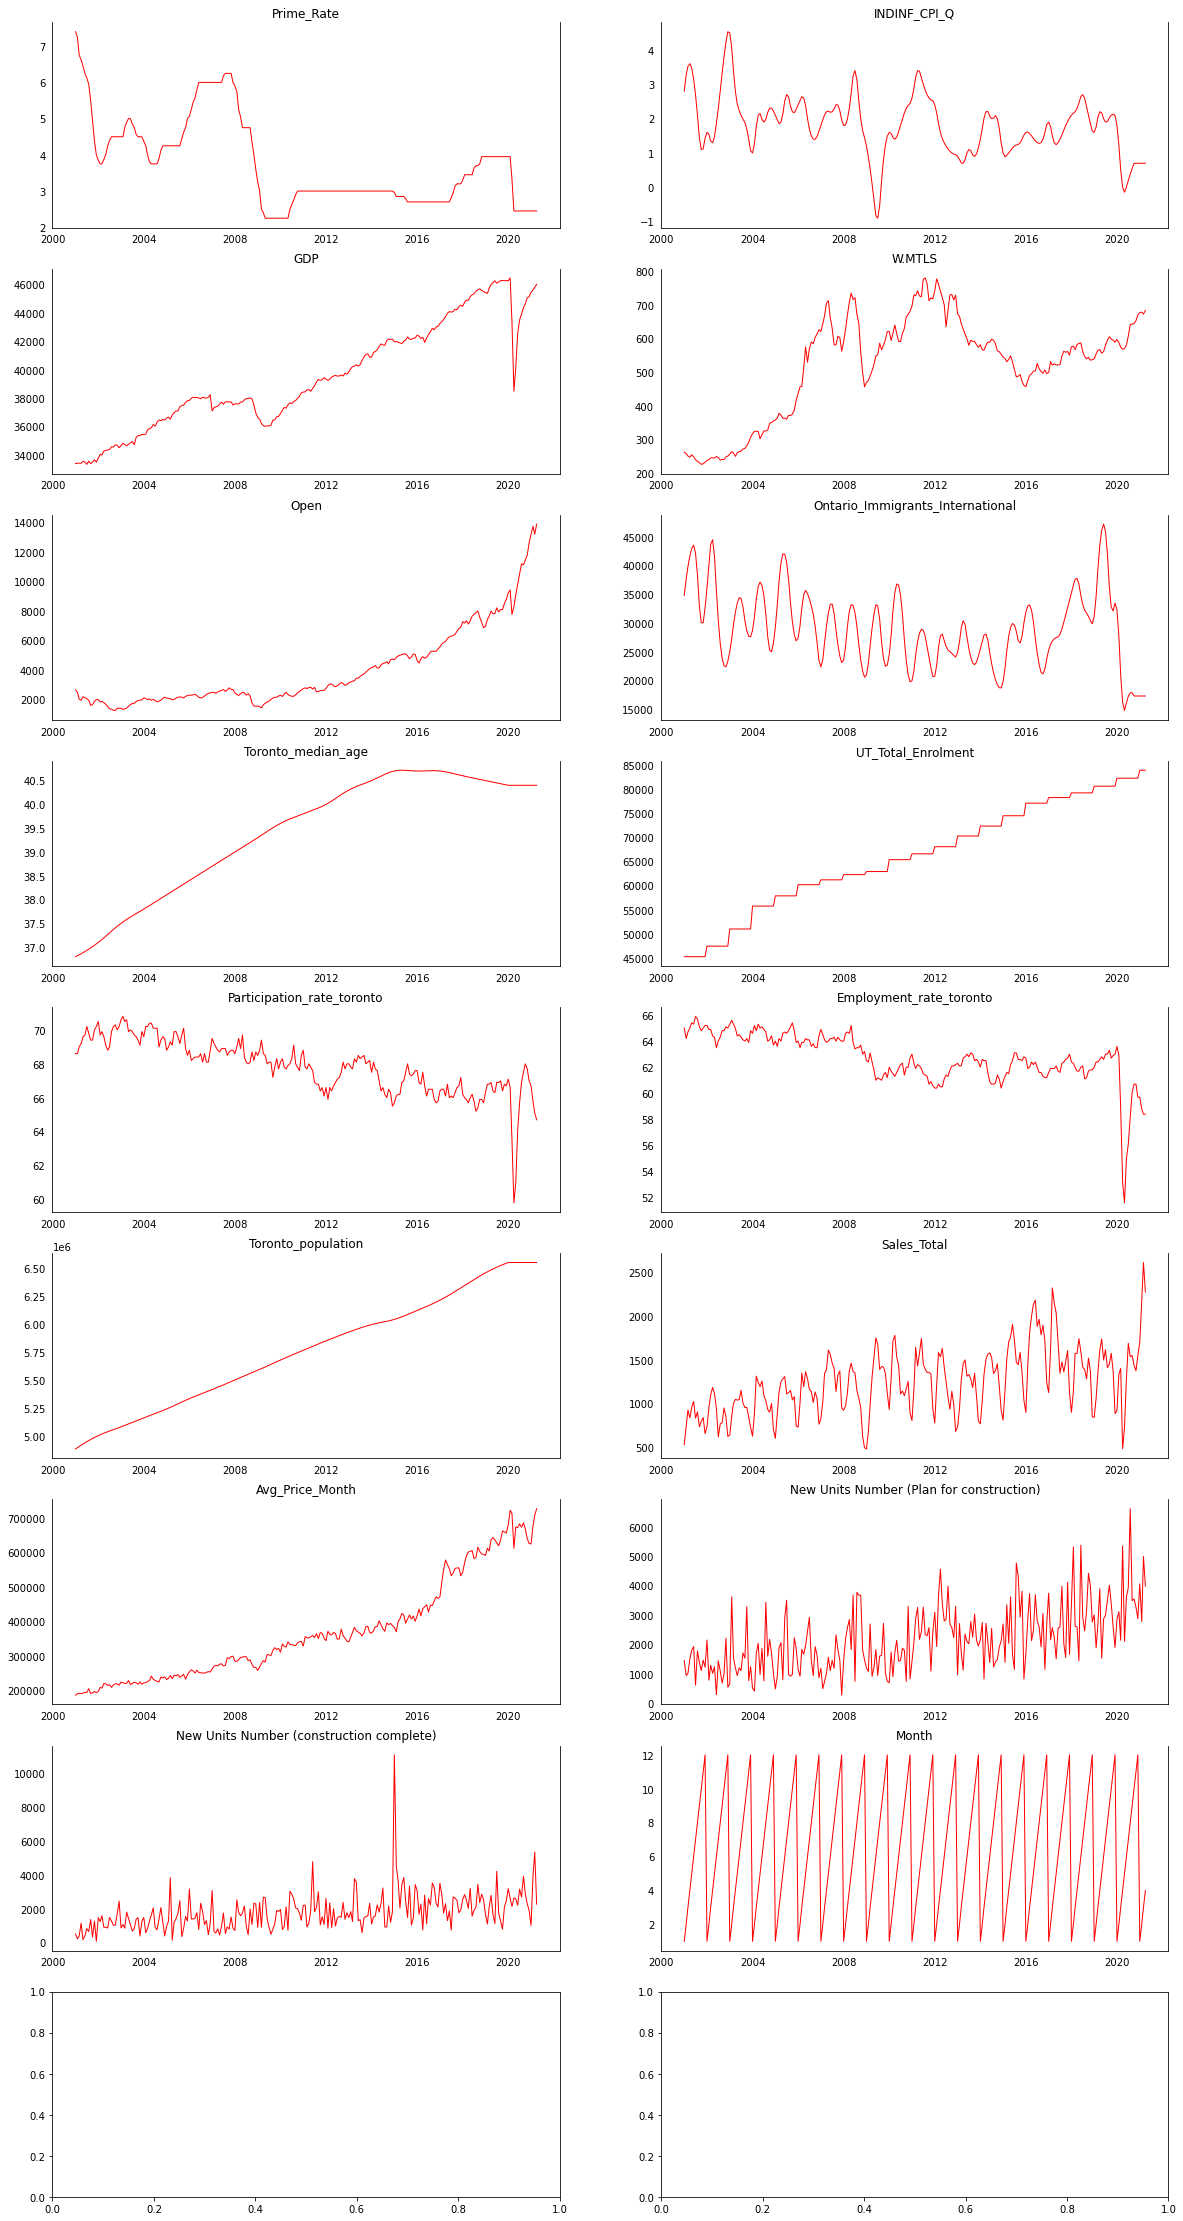

In [12]:
try:
    # Plot
    fig, axes = plt.subplots(nrows=int(len(df.columns)/2+1), ncols=2, figsize=(20,40))
    for i, ax in enumerate(axes.flatten()):
        data = df[df.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
    #     ax.tick_params(labelsize=6)

    plt.tight_layout();
    
except:
    pass


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
df_target = pd.DataFrame()
df_target["Avg_Price_Month"] = df["Avg_Price_Month"]
df.drop(columns = ["Avg_Price_Month"], inplace=True)

In [15]:
df_scaled = StandardScaler().fit_transform(df)
print(df_scaled[0:5])

[[ 3.0314394   1.16141195 -1.64302143 -1.72949598 -0.48435472  0.89824492
  -2.14391064 -1.92167085  0.46954691  1.19741927 -1.78398906 -1.91715057
  -0.63980796 -1.15942046 -1.5687969 ]
 [ 2.90650162  1.71450323 -1.63742363 -1.75575093 -0.54628105  1.33824652
  -2.12745465 -1.92167085  0.46954691  0.78210967 -1.75947619 -1.36976402
  -1.10280166 -1.41565529 -1.28011934]
 [ 2.49004236  2.00473664 -1.63565244 -1.80551314 -0.72272853  1.66651219
  -2.11189626 -1.92167085  0.72162489  1.04167817 -1.73794623 -0.85189341
  -1.04028392 -1.27129764 -0.99144178]
 [ 2.38592754  2.09430506 -1.63813987 -1.82686365 -0.74862531  1.95338457
  -2.09390151 -1.92167085  0.84766388  1.19741927 -1.7147856  -1.09070421
  -0.59812946 -0.58198985 -0.70276422]
 [ 2.2401668   1.94909603 -1.60083781 -1.77877409 -0.65615956  2.15439652
  -2.07571743 -1.92167085  1.09974187  1.40507407 -1.69304857 -0.76334559
  -0.31997082 -1.46257153 -0.41408666]]


In [16]:
pca = PCA(n_components=8)

In [17]:
df_pca = pca.fit_transform(df_scaled)

In [18]:
df_pca_fit = pd.DataFrame(data = df_pca)
df_pca_fit.head()

,0,1,2,3,4,5,6,7
0,-5.372527,-1.179115,0.534767,1.337166,0.591141,2.041912,-0.596144,-0.001713
1,-5.420050,-1.439084,0.277248,0.985548,0.185200,1.774850,-0.773674,0.702008
2,-5.468533,-1.733186,0.126912,0.611624,0.079131,1.152070,-0.389307,0.923727
3,-5.409499,-1.910666,0.015729,0.837927,0.614817,0.732547,0.015757,0.591201
4,-5.486856,-2.041976,-0.423779,0.049691,0.254097,1.081129,0.226004,0.527568


In [19]:
pca.explained_variance_ratio_

array([0.53316507, 0.09663677, 0.07166296, 0.05725705, 0.0547087 ,
       0.04624262, 0.03973268, 0.03041986])

In [20]:
df_target["Avg_Price_Month"]

Date
2001-01-01    185757.6686
2001-02-01    189990.7036
2001-03-01    191476.2205
2001-04-01    189802.6914
2001-05-01    191658.3372
                 ...     
2020-12-01    625828.1154
2021-01-01    624885.6230
2021-02-01    676837.4998
2021-03-01    707835.1083
2021-04-01    727137.3430
Name: Avg_Price_Month, Length: 244, dtype: float64

In [21]:
df_pca_fit.index = df_target.index

In [22]:
df_pca_fit["Avg_Price_Month"] = df_target["Avg_Price_Month"]

In [23]:
df_pca_fit

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2001-01-01,-5.372527,-1.179115,0.534767,1.337166,0.591141,2.041912,-0.596144,-0.001713,185757.6686
2001-02-01,-5.420050,-1.439084,0.277248,0.985548,0.185200,1.774850,-0.773674,0.702008,189990.7036
2001-03-01,-5.468533,-1.733186,0.126912,0.611624,0.079131,1.152070,-0.389307,0.923727,191476.2205
2001-04-01,-5.409499,-1.910666,0.015729,0.837927,0.614817,0.732547,0.015757,0.591201,189802.6914
2001-05-01,-5.486856,-2.041976,-0.423779,0.049691,0.254097,1.081129,0.226004,0.527568,191658.3372
...,...,...,...,...,...,...,...,...,...
2020-12-01,4.666611,1.089440,-1.454996,-0.783678,0.873000,0.477821,-0.483692,0.204829,625828.1154
2021-01-01,5.047221,-0.267351,0.585901,-0.244710,-0.164934,2.237588,0.210739,0.315483,624885.6230
2021-02-01,5.923070,-0.297703,1.379302,0.202430,0.536660,0.006413,-0.094186,0.940661,676837.4998


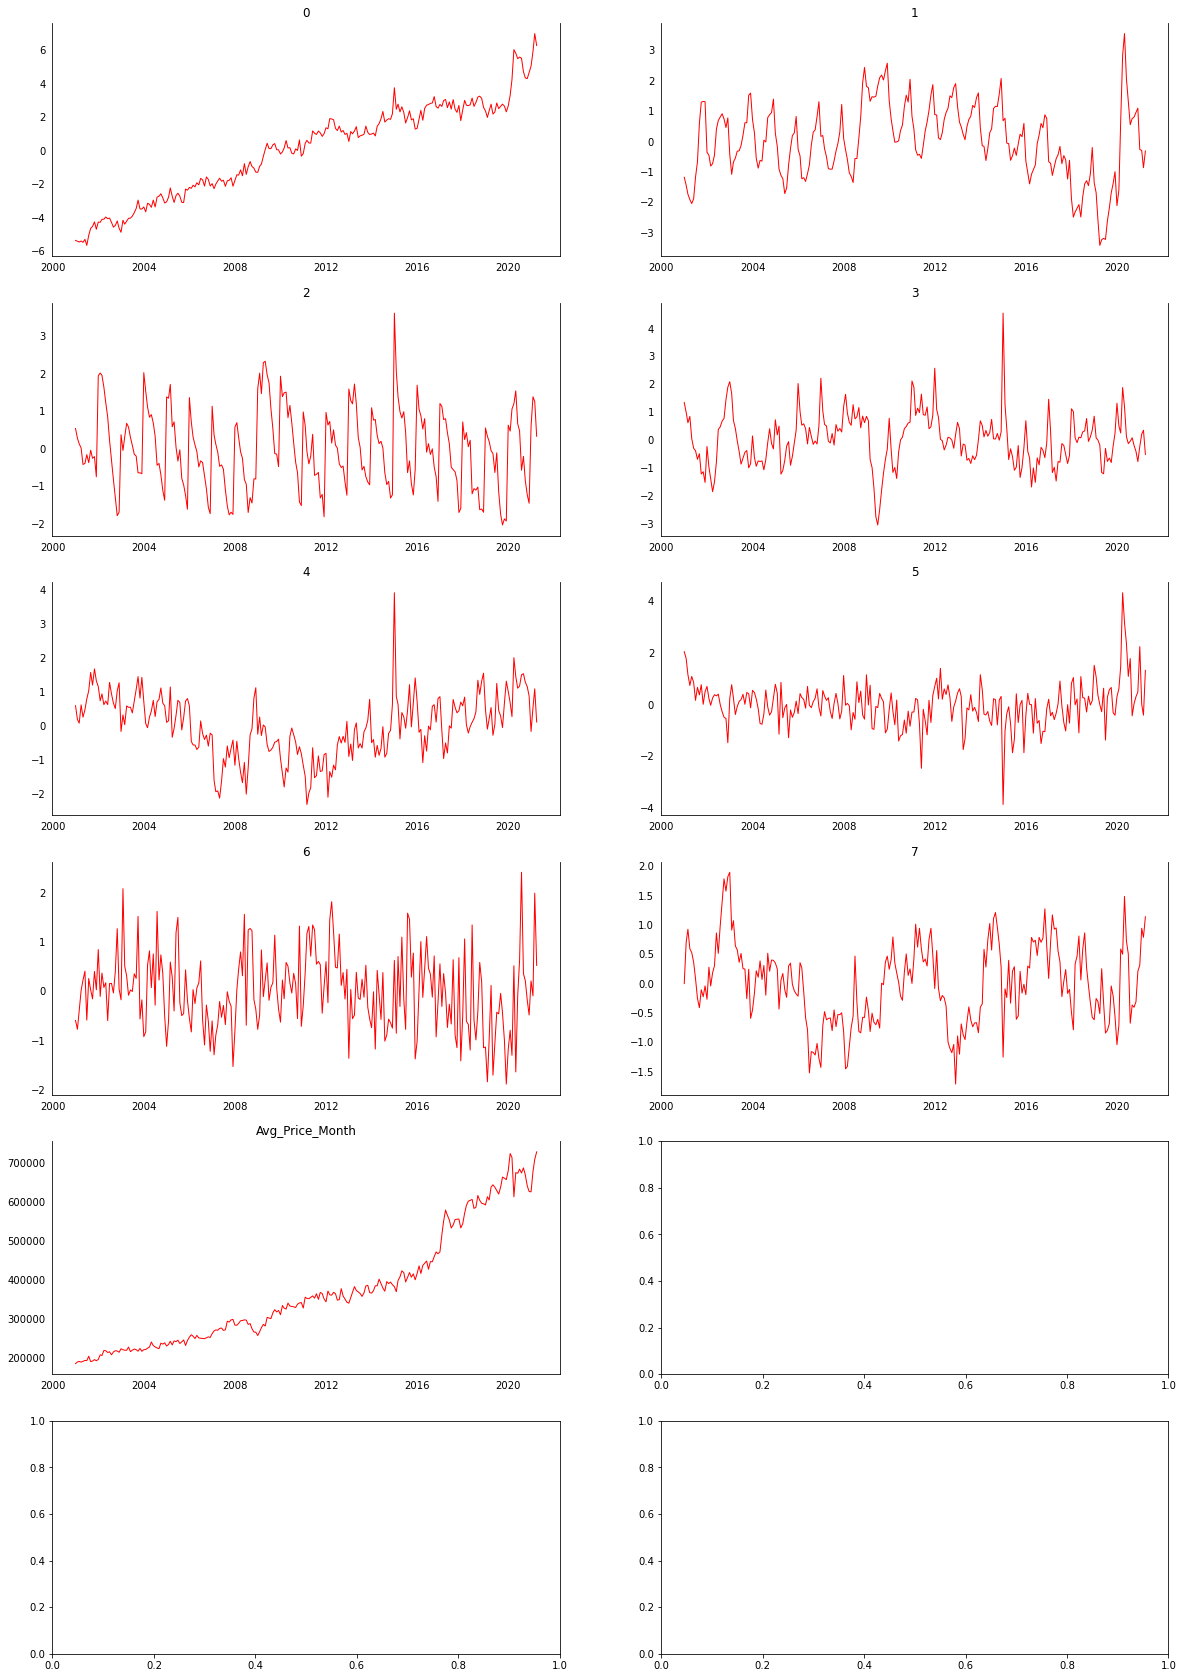

In [24]:
try:
    # Plot
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,30))
    for i, ax in enumerate(axes.flatten()):
        data = df_pca_fit[df_pca_fit.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(df_pca_fit.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
    #     ax.tick_params(labelsize=6)

    plt.tight_layout();
except:
    pass

In [25]:
df = df_pca_fit.copy()

In [26]:
df["Avg_Price_Month"] = df["Avg_Price_Month"]/100000

In [27]:
df

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2001-01-01,-5.372527,-1.179115,0.534767,1.337166,0.591141,2.041912,-0.596144,-0.001713,1.857577
2001-02-01,-5.420050,-1.439084,0.277248,0.985548,0.185200,1.774850,-0.773674,0.702008,1.899907
2001-03-01,-5.468533,-1.733186,0.126912,0.611624,0.079131,1.152070,-0.389307,0.923727,1.914762
2001-04-01,-5.409499,-1.910666,0.015729,0.837927,0.614817,0.732547,0.015757,0.591201,1.898027
2001-05-01,-5.486856,-2.041976,-0.423779,0.049691,0.254097,1.081129,0.226004,0.527568,1.916583
...,...,...,...,...,...,...,...,...,...
2020-12-01,4.666611,1.089440,-1.454996,-0.783678,0.873000,0.477821,-0.483692,0.204829,6.258281
2021-01-01,5.047221,-0.267351,0.585901,-0.244710,-0.164934,2.237588,0.210739,0.315483,6.248856
2021-02-01,5.923070,-0.297703,1.379302,0.202430,0.536660,0.006413,-0.094186,0.940661,6.768375


In [28]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [str(var) + '_x' for var in variables]
    df.index = [str(var) + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)    

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,Avg_Price_Month_x
0_y,1.0000,0.0000,0.0011,0.0138,0.0000,0.0028,0.0000,0.0000,0.0030
1_y,0.0000,1.0000,0.0000,0.0000,0.0119,0.1540,0.0000,0.0014,0.0002
2_y,0.0005,0.0000,1.0000,0.0000,0.0000,0.0000,0.0150,0.0059,0.0107
3_y,0.0000,0.0000,0.0000,1.0000,0.0112,0.0100,0.0009,0.0309,0.0097
4_y,0.0681,0.0000,0.0000,0.0000,1.0000,0.0000,0.0326,0.0001,0.0416
5_y,0.1294,0.0000,0.0014,0.0040,0.0006,1.0000,0.0001,0.4488,0.0001
6_y,0.1194,0.0000,0.0001,0.0035,0.0001,0.2918,1.0000,0.0000,0.0497
7_y,0.0000,0.0271,0.0035,0.0000,0.0021,0.1740,0.0000,1.0000,0.1447
Avg_Price_Month_y,0.0120,0.0000,0.0000,0.0020,0.0583,0.0006,0.0243,0.3021,1.0000


In [29]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
0      ::  328.57    > 179.5199  =>   True
1      ::  218.91    > 143.6691  =>   True
2      ::  157.37    > 111.7797  =>   True
3      ::  106.05    > 83.9383   =>   True
4      ::  73.24     > 60.0627   =>   True
5      ::  44.0      > 40.1749   =>   True
6      ::  19.83     > 24.2761   =>   False
7      ::  4.88      > 12.3212   =>   False
Avg_Price_Month ::  0.06      > 4.1296    =>   False


In [30]:
nobs = 25+4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape) 
print(df_test.shape)  

(215, 9)
(29, 9)


In [31]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [32]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.331
 No. Lags Chosen       = 2
 Critical value 1%     = -3.462
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.6149. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6649
 No. Lags Chosen       = 15
 Critical value 1%     = -3.464
 Critical value 5%     = -2.876
 Critical value 10%    = -2.575
 => P-Value = 0.4493. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-S

In [33]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [34]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -14.0314
 No. Lags Chosen       = 1
 Critical value 1%     = -3.462
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.5142
 No. Lags Chosen       = 14
 Critical value 1%     = -3.464
 Critical value 5%     = -2.876
 Critical value 10%    = -2.575
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Tes

In [35]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [36]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.4635
 No. Lags Chosen       = 15
 Critical value 1%     = -3.464
 Critical value 5%     = -2.876
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.6482
 No. Lags Chosen       = 15
 Critical value 1%     = -3.464
 Critical value 5%     = -2.876
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test S

In [37]:
df_differenced

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2001-03-01,-0.000960,-0.034133,0.107182,-0.022306,0.299873,-0.355718,0.561897,-0.482003,-0.027475
2001-04-01,0.107518,0.116623,0.039153,0.600227,0.641754,0.203257,0.020697,-0.554245,-0.031590
2001-05-01,-0.136391,0.046170,-0.328325,-1.014539,-0.896405,0.768105,-0.194817,0.268893,0.035292
2001-06-01,0.255053,0.289764,0.467168,0.433563,0.576950,-0.575395,-0.028116,-0.102090,0.003864
2001-07-01,-0.537915,0.549014,0.206041,0.266817,0.102109,-0.470565,-1.178056,-0.113820,-0.026289
...,...,...,...,...,...,...,...,...,...
2018-07-01,-0.899670,1.072497,1.564794,0.236819,-0.017994,-2.997121,-4.483246,1.271476,-0.254301
2018-08-01,0.733537,-0.242186,-0.178427,-0.177633,0.097454,0.798306,1.530547,-0.243853,0.257905
2018-09-01,0.090517,-0.313413,0.120834,0.409802,0.719600,-0.519268,0.984220,-0.871131,0.274179


In [38]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -18.975562673532963
BIC :  -17.550596802209938
FPE :  5.745021880326983e-09
HQIC:  -18.399624753895136 

Lag Order = 2
AIC :  -20.496883511332086
BIC :  -17.780448720695084
FPE :  1.2595879921135827e-09
HQIC:  -19.398846616428848 

Lag Order = 3
AIC :  -21.067162873725756
BIC :  -17.05063383686479
FPE :  7.192680671563123e-10
HQIC:  -19.44342903474781 

Lag Order = 4
AIC :  -21.45246787078652
BIC :  -16.12712190952201
FPE :  4.989390312379465e-10
HQIC:  -19.299399224492266 

Lag Order = 5
AIC :  -21.755981860047193
BIC :  -15.112997412949376
FPE :  3.806618359001466e-10
HQIC:  -19.06990004908162 

Lag Order = 6
AIC :  -21.956442898549454
BIC :  -13.986897958132268
FPE :  3.2771534073520377e-10
HQIC:  -18.733628460563104 

Lag Order = 7
AIC :  -22.25277435758263
BIC :  -12.94764487591856
FPE :  2.622682568898603e-10
HQIC:  -18.48946610290609 



C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [39]:
x = model.select_order(maxlags=17)
x.summary()

,AIC,BIC,FPE,HQIC
0,-16.07,-15.92,1.048e-07,-16.01
1,-18.96,-17.46,5.828e-09,-18.35
2,-20.55,-17.69*,1.197e-09,-19.39
3,-21.13,-16.92,6.772e-10,-19.42
4,-21.52,-15.95,4.690e-10,-19.27
5,-21.89,-14.96,3.385e-10,-19.08
6,-22.07,-13.79,2.997e-10,-18.72
7,-22.47,-12.83,2.191e-10,-18.56
8,-22.54,-11.55,2.279e-10,-18.09
9,-22.81,-10.47,2.027e-10,-17.81


In [40]:
# 14
# 15
# 17
model_fitted = model.fit(15)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 05, Jun, 2021
Time:                     22:17:45
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -11.2245
Nobs:                     198.000    HQIC:                  -23.3241
Log likelihood:           1819.10    FPE:                3.23514e-13
AIC:                     -31.5520    Det(Omega_mle):     2.92524e-15
--------------------------------------------------------------------
Results for equation 0
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.002163         0.021706            0.100           0.921
L1.0                       -0.415714         0.586783           -0.708           0.479
L1.1                        1.501476    

In [41]:
def adjust(val, length= 6): return str(val).ljust(length)

In [42]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

0      : 1.93
1      : 1.87
2      : 1.99
3      : 1.96
4      : 2.01
5      : 1.98
6      : 1.99
7      : 2.01
Avg_Price_Month : 2.0


In [43]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

15


array([[-1.14516529,  0.83048756,  0.00778907, -0.73777459, -1.07021882,
         0.33186821, -2.84671979,  0.85830355,  0.06233418],
       [ 0.3886126 , -0.40476343, -0.17279741, -0.26093607,  0.06618351,
         0.30934418,  1.28591548, -0.06581901, -0.12965161],
       [ 0.60236212, -0.49074687, -0.61897706,  0.00929353,  0.21943553,
         1.34739656,  2.08453541, -0.60540819, -0.00543378],
       [-1.32196419,  1.24578   ,  0.95772394,  0.60812739,  0.19958006,
        -1.73262148, -3.933988  ,  0.47618755, -0.23087065],
       [ 1.54001394, -1.86811764,  2.19722751,  1.38397756, -0.36828221,
         2.25572436,  3.0076177 , -0.45659686,  0.3327376 ],
       [-0.05340791,  0.64375729, -2.77471805, -1.77239302,  0.36831634,
        -1.31839611,  0.66951908,  0.08705321,  0.16418044],
       [-0.87388514,  0.77450819,  0.6548489 , -0.84321356, -1.0668494 ,
        -1.27971315, -3.25002554,  1.42197681, -0.07087409],
       [ 0.2733195 , -0.03782466, -0.55803475,  0.76882732,  0

In [44]:
col_list = list()
for col in df.columns:
    col_list.append(str(col))
df.columns = col_list 

In [45]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,0_2d,1_2d,2_2d,3_2d,4_2d,5_2d,6_2d,7_2d,Avg_Price_Month_2d
Date,,,,,,,,,
2018-12-01,-0.003176,0.173734,-0.343153,0.126128,0.204348,1.231562,0.064798,-0.109046,-0.132838
2019-01-01,0.429744,-1.769025,3.333405,1.457180,-0.146255,-1.008496,0.524885,-0.108350,0.365173
2019-02-01,-0.520640,0.824230,-2.974114,-2.724780,-1.414495,-1.162609,-1.090035,0.970774,-0.004697
2019-03-01,0.881759,-0.474215,-0.888727,-0.025240,0.349387,2.500879,2.886339,-0.335730,0.162575
2019-04-01,-1.242833,1.175572,0.642769,0.013104,-0.481546,-1.373536,-3.493373,0.657104,-0.084957
2019-05-01,0.892383,-0.202815,0.057773,1.254674,1.782533,0.186951,2.023824,-0.742341,-0.222557
2019-06-01,-0.005521,0.235937,-0.068606,0.297920,0.022801,-0.000756,-0.213413,-0.255128,-0.148321
2019-07-01,-0.172914,-0.057251,0.087935,-0.288270,-0.358814,-0.368892,-0.367737,0.127206,-0.057252
2019-08-01,-0.421496,-0.160881,-0.954852,-0.990900,-1.068196,1.908324,0.590903,-0.243758,0.374036


In [46]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [47]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results

,0_2d,1_2d,2_2d,3_2d,4_2d,5_2d,6_2d,7_2d,Avg_Price_Month_2d,0_1d,...,4_1d,4_forecast,5_1d,5_forecast,6_1d,6_forecast,7_1d,7_forecast,Avg_Price_Month_1d,Avg_Price_Month_forecast
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-01,-0.003176,0.173734,-0.343153,0.126128,0.204348,1.231562,0.064798,-0.109046,-0.132838,-0.134943,...,0.594856,1.905817,0.887565,0.861710,-0.331976,-0.142158,-0.402676,-0.733111,-0.207597,5.749177
2019-01-01,0.429744,-1.769025,3.333405,1.457180,-0.146255,-1.008496,0.524885,-0.108350,0.365173,0.294800,...,0.448601,2.354418,-0.120931,0.740779,0.192909,0.050751,-0.511025,-1.244137,0.157576,5.906754
2019-02-01,-0.520640,0.824230,-2.974114,-2.724780,-1.414495,-1.162609,-1.090035,0.970774,-0.004697,-0.225840,...,-0.965894,1.388524,-1.283540,-0.542762,-0.897126,-0.846375,0.459748,-0.784388,0.152879,6.059632
2019-03-01,0.881759,-0.474215,-0.888727,-0.025240,0.349387,2.500879,2.886339,-0.335730,0.162575,0.655919,...,-0.616507,0.772017,1.217339,0.674577,1.989213,1.142837,0.124018,-0.660370,0.315453,6.375086
2019-04-01,-1.242833,1.175572,0.642769,0.013104,-0.481546,-1.373536,-3.493373,0.657104,-0.084957,-0.586914,...,-1.098053,-0.326036,-0.156197,0.518381,-1.504160,-0.361323,0.781122,0.120752,0.230496,6.605582
2019-05-01,0.892383,-0.202815,0.057773,1.254674,1.782533,0.186951,2.023824,-0.742341,-0.222557,0.305469,...,0.684480,0.358443,0.030754,0.549135,0.519664,0.158341,0.038781,0.159532,0.007939,6.613521
2019-06-01,-0.005521,0.235937,-0.068606,0.297920,0.022801,-0.000756,-0.213413,-0.255128,-0.148321,0.299948,...,0.707280,1.065724,0.029999,0.579134,0.306251,0.464592,-0.216348,-0.056815,-0.140382,6.473139
2019-07-01,-0.172914,-0.057251,0.087935,-0.288270,-0.358814,-0.368892,-0.367737,0.127206,-0.057252,0.127034,...,0.348466,1.414190,-0.338893,0.240241,-0.061486,0.403106,-0.089142,-0.145957,-0.197634,6.275504
2019-08-01,-0.421496,-0.160881,-0.954852,-0.990900,-1.068196,1.908324,0.590903,-0.243758,0.374036,-0.294462,...,-0.719729,0.694460,1.569431,1.809672,0.529417,0.932523,-0.332900,-0.478857,0.176402,6.451906


In [48]:
col_list = list()
for col in df_test.columns:
    col_list.append(str(col))
df_test.columns = col_list 

In [67]:
col,ax

('Bank_of_Canada_Overnight_Rate', <AxesSubplot:>)

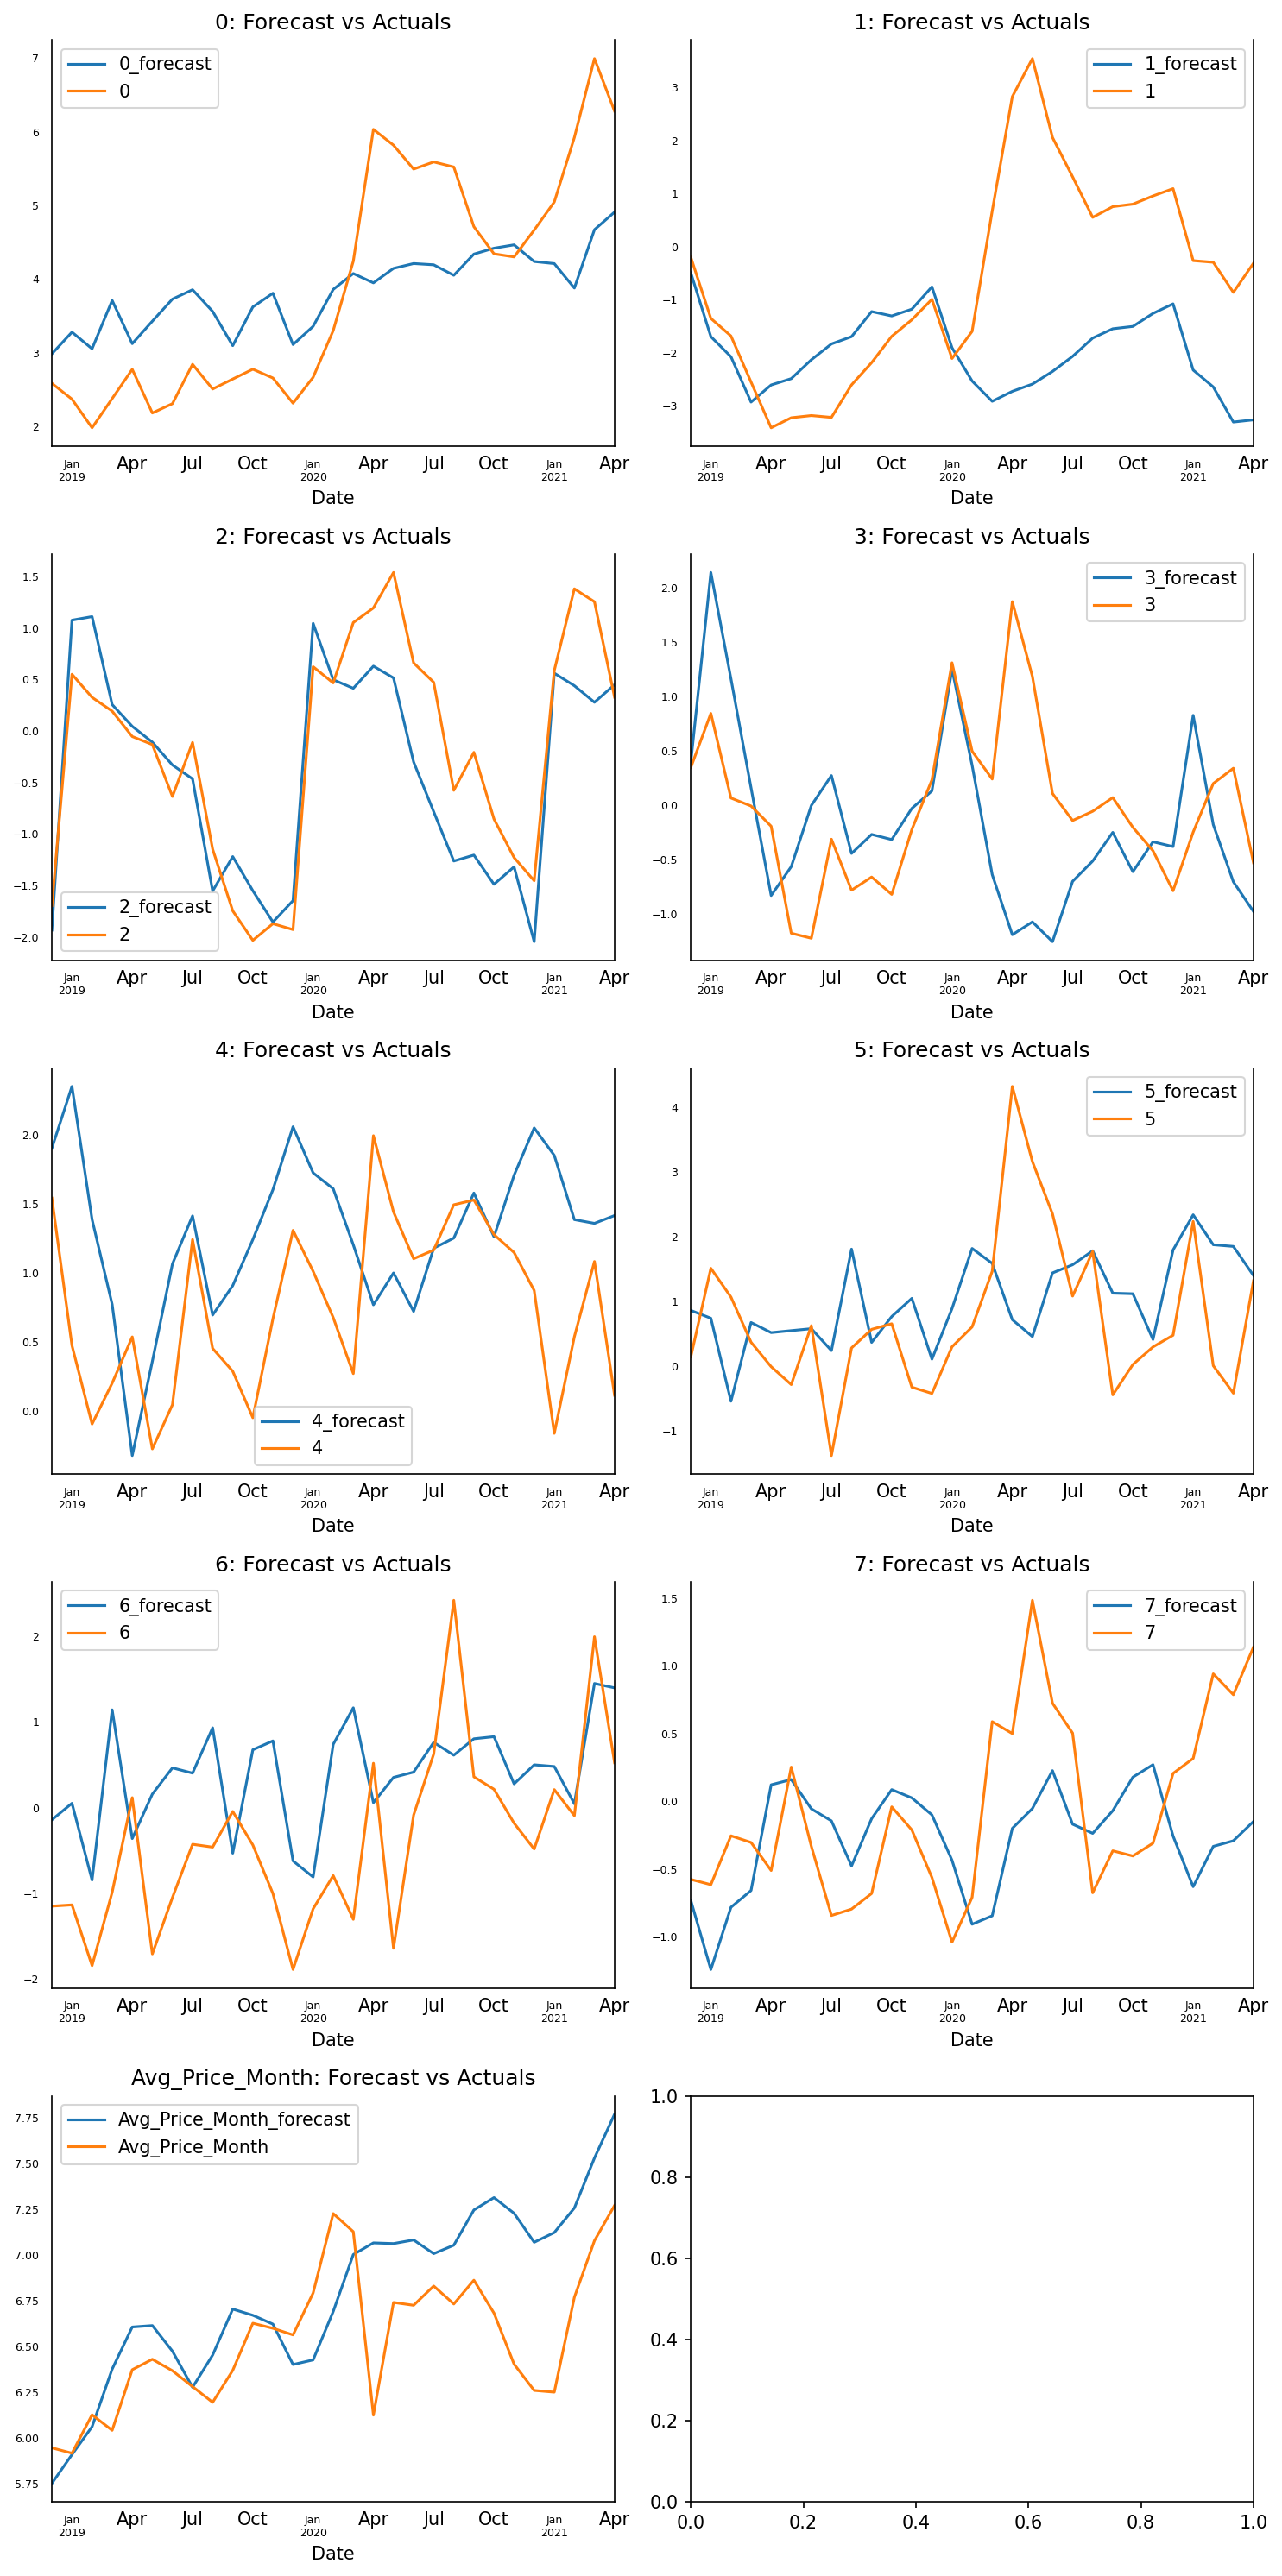

In [49]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2+1), ncols=2, dpi=150, figsize=(10,20))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [50]:
df_results['Avg_Price_Month_forecast']

Date
2018-12-01    5.749177
2019-01-01    5.906754
2019-02-01    6.059632
2019-03-01    6.375086
2019-04-01    6.605582
2019-05-01    6.613521
2019-06-01    6.473139
2019-07-01    6.275504
2019-08-01    6.451906
2019-09-01    6.703739
2019-10-01    6.669811
2019-11-01    6.621404
2019-12-01    6.400060
2020-01-01    6.425500
2020-02-01    6.690619
2020-03-01    7.002371
2020-04-01    7.066238
2020-05-01    7.062554
2020-06-01    7.082303
2020-07-01    7.007388
2020-08-01    7.053544
2020-09-01    7.246433
2020-10-01    7.314115
2020-11-01    7.228387
2020-12-01    7.069618
2021-01-01    7.122733
2021-02-01    7.257473
2021-03-01    7.531141
2021-04-01    7.770879
Name: Avg_Price_Month_forecast, dtype: float64

In [51]:
df_test.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', 'Avg_Price_Month'], dtype='object')

In [52]:
df_final = df_results[['Avg_Price_Month_forecast']].join(df_test[["Avg_Price_Month"]])

In [53]:
df_final

,Avg_Price_Month_forecast,Avg_Price_Month
Date,,
2018-12-01,5.749177,5.943815
2019-01-01,5.906754,5.914439
2019-02-01,6.059632,6.124885
2019-03-01,6.375086,6.039691
2019-04-01,6.605582,6.371804
2019-05-01,6.613521,6.428907
2019-06-01,6.473139,6.366065
2019-07-01,6.275504,6.279269
2019-08-01,6.451906,6.193065


In [54]:
df_test["Avg_Price_Month"]

Date
2018-12-01    5.943815
2019-01-01    5.914439
2019-02-01    6.124885
2019-03-01    6.039691
2019-04-01    6.371804
2019-05-01    6.428907
2019-06-01    6.366065
2019-07-01    6.279269
2019-08-01    6.193065
2019-09-01    6.368175
2019-10-01    6.626311
2019-11-01    6.598553
2019-12-01    6.562325
2020-01-01    6.791822
2020-02-01    7.226747
2020-03-01    7.127458
2020-04-01    6.123005
2020-05-01    6.740281
2020-06-01    6.724651
2020-07-01    6.829996
2020-08-01    6.731739
2020-09-01    6.861914
2020-10-01    6.681606
2020-11-01    6.402078
2020-12-01    6.258281
2021-01-01    6.248856
2021-02-01    6.768375
2021-03-01    7.078351
2021-04-01    7.271373
Name: Avg_Price_Month, dtype: float64